<a href="https://colab.research.google.com/github/carlosmvond/modelos_predictivos/blob/main/MP_clase19nov_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

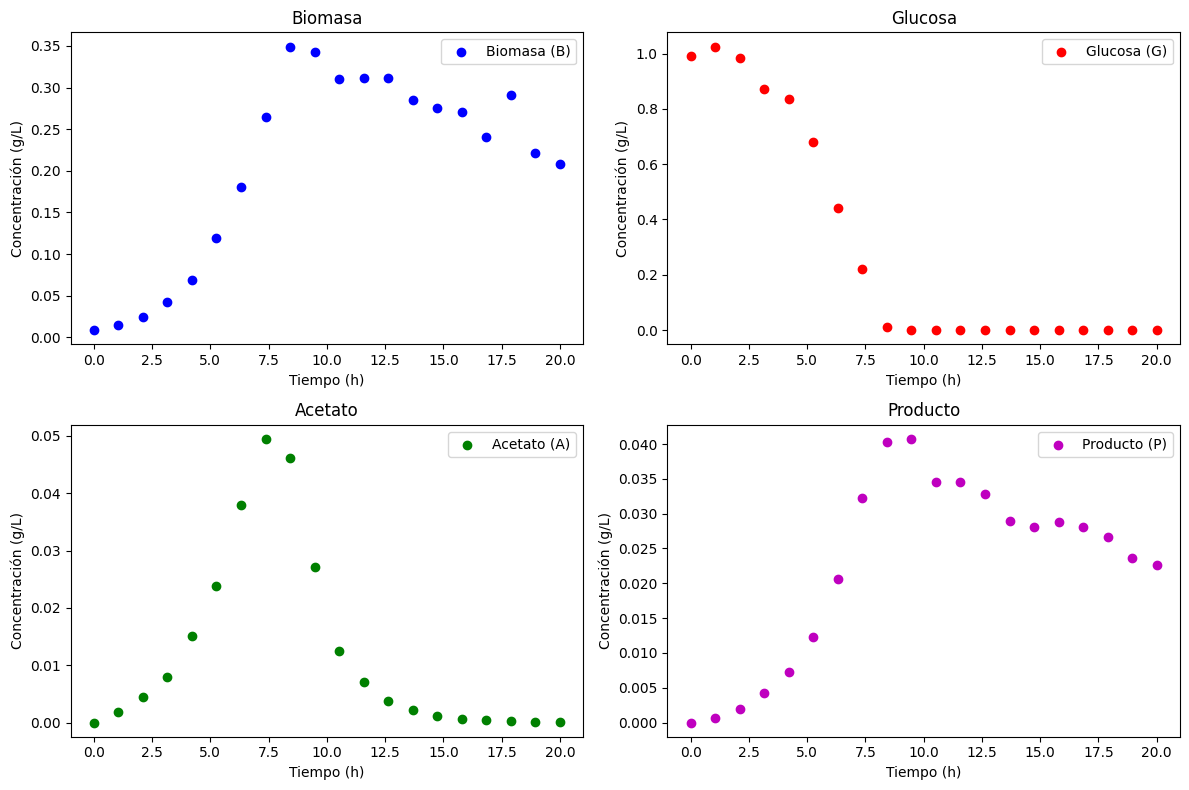

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


t_data=np.array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.      ])


B_data=np.array([0.00877976, 0.01520039, 0.0250105 , 0.04232506, 0.06878298,
       0.11874526, 0.18071247, 0.26465471, 0.34925955, 0.34309061,
       0.31017548, 0.31100193, 0.31161408, 0.28507902, 0.27574825,
       0.27095044, 0.24079196, 0.2912469 , 0.22188565, 0.20852259])


G_data=np.array([9.90112245e-01, 1.02594796e+00, 9.83344921e-01, 8.70552106e-01,
       8.35064870e-01, 6.81908760e-01, 4.41695442e-01, 2.22069776e-01,
       1.18790833e-02, 5.76251178e-05, 6.38958826e-07, 4.65843958e-07,
       4.60759907e-07, 4.57171084e-07, 4.65008637e-07, 4.47394963e-07,
       4.19730568e-07, 4.57273937e-07, 4.85932648e-07, 4.47138183e-07])


A_data=np.array([0.00000000e+00, 1.75815471e-03, 4.44915116e-03, 7.88709696e-03,
       1.51824824e-02, 2.37695919e-02, 3.80164891e-02, 4.94701775e-02,
       4.62133502e-02, 2.70821154e-02, 1.25345680e-02, 7.13516421e-03,
       3.75631889e-03, 2.13992702e-03, 1.07108564e-03, 6.40596522e-04,
       3.83035829e-04, 2.35569017e-04, 1.42046086e-04, 9.18826561e-05])

P_data=np.array([0.        , 0.00070892, 0.00191551, 0.00424741, 0.00720176,
       0.01226091, 0.02063591, 0.03222553, 0.04022047, 0.04071744,
       0.03448172, 0.03447876, 0.03281655, 0.0289967 , 0.0281341 ,
       0.02882118, 0.02812076, 0.02670973, 0.02360895, 0.02259973])


# Create the plots
plt.figure(figsize=(12, 8))

# Plot Biomass (B) as scatter plot
plt.subplot(2, 2, 1)
plt.scatter(t_data, B_data, color='b', label='Biomasa (B)', zorder=5)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Biomasa')
plt.legend()

# Plot Glucose (G) as scatter plot
plt.subplot(2, 2, 2)
plt.scatter(t_data, G_data, color='r', label='Glucosa (G)', zorder=5)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Glucosa')
plt.legend()

# Plot Acetate (A) as scatter plot
plt.subplot(2, 2, 3)
plt.scatter(t_data, A_data, color='g', label='Acetato (A)', zorder=5)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Acetato')
plt.legend()

# Plot Product (P) as scatter plot
plt.subplot(2, 2, 4)
plt.scatter(t_data, P_data, color='m', label='Producto (P)', zorder=5)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (g/L)')
plt.title('Producto')
plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir los parámetros
Yh = 0.1
kg = 1.53   # g g D/W/h
Kg = 0.09  # g/L
Theta_A = 0.52  # g/L
k_over = 0.17  # adimensional
l = 0.7  # g gD/W/h
ka = 0.97   # g gD/W/L
Ka = 0.5  # g/L
Theta_G = 0.25  # g gD/W/L
Y_a = 0.298  # gD/W/L
Y_g = 0.44  # gD/W/L
kdeg = 0.044


# Definir el modelo
def ode_model(t, y, Yh):
    B, G, A, P = y

    r_upg = kg * (G / (G + Kg)) * (Theta_A / (A + Theta_A))  # Tasa de absorción de glucosa
    r_upa = ka * (A / (A + Ka)) * (Theta_G / (Theta_G + r_upg))  # Consumo de acetato

    if r_upg < l:
        r_overa = 0  # No hay sobreproducción de acetato
    else:
        r_overa = k_over * (r_upg - l)  # Sobreproducción de acetato

    if G < 0:
        r_upg = 0  # No hay sobreproducción de acetato

    f = Y_g * r_upg - Y_a * r_overa + Y_a * r_upa
    dBdt = (1 - Yh) * f * B  - kdeg * B
    dGdt = - r_upg * B
    dAdt = (r_overa * B - r_upa * B)
    dPdt = Yh * f * B - kdeg * P

    return [dBdt, dGdt, dAdt, dPdt]


